In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor

import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import LinearSVC
from  sklearn import model_selection
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import sklearn.metrics as sklm
import warnings
warnings.filterwarnings('ignore')
import sys

In [2]:
train_data = pd.read_csv("train_values.csv")
test_data = pd.read_csv("test_values.csv")

total_columns=['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant']
withoutNaN=['loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex']

train_data['minority_population_pct']=train_data['minority_population_pct']*1000
test_data['minority_population_pct']=test_data['minority_population_pct']*1000
train_data['tract_to_msa_md_income_pct']=train_data['tract_to_msa_md_income_pct']*1000
test_data['tract_to_msa_md_income_pct']=test_data['tract_to_msa_md_income_pct']*1000

def NaNwithKNN(train_data,test_data,col):
#applicant_income\population\minority_population_pct\ffiecmedian_family_income\tract_to_msa_md_income_pct
#\number_of_owner-occupied_units\number_of_1_to_4_family_units
#分為有Null and not Null
    train_appincome_all=train_data[train_data[col].isnull()==False]
    predict_appincome=train_data[train_data[col].isnull()==True]
    train_appincome=train_appincome_all[withoutNaN]
    model =KNeighborsRegressor()
    model.fit(train_appincome,train_appincome_all[col])
    predict=model.predict(predict_appincome[withoutNaN])
    predict_appincome[col]=predict
    new_train_data=pd.concat([predict_appincome, train_appincome_all])
    train_data=new_train_data.sort_values(by=['row_id'])
    
    test_appincome_all=test_data[test_data[col].isnull()==False]
    predict_test=test_data[test_data[col].isnull()==True]
    test_appincome=test_appincome_all[withoutNaN]
    model =KNeighborsRegressor()
    model.fit(test_appincome,test_appincome_all[col])
    predict=model.predict(predict_test[withoutNaN])
    predict_test[col]=predict
    new_test_data=pd.concat([predict_test, test_appincome_all])
    test_data=new_test_data.sort_values(by=['row_id'])
    return(train_data,test_data)



#applicant_income\population\minority_population_pct\ffiecmedian_family_income\tract_to_msa_md_income_pct
#\number_of_owner-occupied_units\number_of_1_to_4_family_units
cols=[]
train_data,test_data=NaNwithKNN(train_data,test_data,'applicant_income')
train_data,test_data=NaNwithKNN(train_data,test_data,'population')
train_data,test_data=NaNwithKNN(train_data,test_data,'ffiecmedian_family_income')
train_data,test_data=NaNwithKNN(train_data,test_data,'number_of_owner-occupied_units')
train_data,test_data=NaNwithKNN(train_data,test_data,'number_of_1_to_4_family_units')


#先乘1000換完在除回來

def NaNwithKNNpct(train_data,test_data,col):
#applicant_income\population\minority_population_pct\ffiecmedian_family_income\tract_to_msa_md_income_pct
#\number_of_owner-occupied_units\number_of_1_to_4_family_units
#分為有Null and not Null
    train_appincome_all=train_data[train_data[col].isnull()==False]
    train_appincome_all[col]=train_appincome_all[col].astype(int)
    predict_appincome=train_data[train_data[col].isnull()==True]
    train_appincome=train_appincome_all[withoutNaN]
    model =KNeighborsRegressor()
    model.fit(train_appincome,train_appincome_all[col])
    predict=model.predict(predict_appincome[withoutNaN])
    predict_appincome[col]=predict
    new_train_data=pd.concat([predict_appincome, train_appincome_all])
    train_data=new_train_data.sort_values(by=['row_id'])
    
    test_appincome_all=test_data[test_data[col].isnull()==False]
    test_appincome_all[col]=test_appincome_all[col].astype(int)
    predict_test=test_data[test_data[col].isnull()==True]
    test_appincome=test_appincome_all[withoutNaN]
    model =KNeighborsRegressor()
    model.fit(test_appincome,test_appincome_all[col])
    predict=model.predict(predict_test[withoutNaN])
    predict_test[col]=predict
    new_test_data=pd.concat([predict_test, test_appincome_all])
    test_data=new_test_data.sort_values(by=['row_id'])
    return(train_data,test_data)


train_data,test_data=NaNwithKNNpct(train_data,test_data,'minority_population_pct')
train_data,test_data=NaNwithKNNpct(train_data,test_data,'tract_to_msa_md_income_pct')

train_data['minority_population_pct']=train_data['minority_population_pct']/1000
test_data['minority_population_pct']=test_data['minority_population_pct']/1000
train_data['tract_to_msa_md_income_pct']=train_data['tract_to_msa_md_income_pct']/1000
test_data['tract_to_msa_md_income_pct']=test_data['tract_to_msa_md_income_pct']/1000

特徵工程

In [3]:
train_labels=pd.read_csv("train_labels.csv")
train_data=train_data.join(train_labels.set_index("row_id"),on="row_id")

msa_md = pd.crosstab(index=train_data["msa_md"], columns=train_data["accepted"])
state_code = pd.crosstab(index=train_data["state_code"], columns=train_data["accepted"])
lender = pd.crosstab(index=train_data["lender"], columns=train_data["accepted"])
county_code = pd.crosstab(index=train_data["county_code"],columns=train_data["accepted"])

msa_md_accept_rate=round(msa_md[1]/(msa_md[1]+msa_md[0]),2)
state_accept_rate=round(state_code[1]/(state_code[1]+state_code[0]),2)
lender_accept_rate=round(lender[1]/(lender[1]+lender[0]),2)
county_accept_rate=round((county_code[1]/(county_code[1]+county_code[0])),2)

lender_accept_rate = pd.DataFrame({'lender':lender_accept_rate.index, 'lender_accept_prob':lender_accept_rate.values})
msa_md_accept_rate = pd.DataFrame({'msa_md':msa_md_accept_rate.index, 'msa_accept_prob':msa_md_accept_rate.values})
state_accept_rate=pd.DataFrame({"state_code":state_accept_rate.index, 'state_accept_prob':state_accept_rate.values})
county_accept_rate=pd.DataFrame({"county_code":county_accept_rate.index, 'county_accept_prob':county_accept_rate.values})

train_data=pd.merge(train_data,county_accept_rate,how='left',on="county_code")
train_data=pd.merge(train_data,msa_md_accept_rate,on="msa_md")
train_data=pd.merge(train_data,state_accept_rate,on="state_code")
train_data=pd.merge(train_data,lender_accept_rate,on="lender")

test_data=pd.merge(test_data,county_accept_rate,how='left',on="county_code")
test_data=pd.merge(test_data,msa_md_accept_rate,how='left',on="msa_md")
test_data=pd.merge(test_data,state_accept_rate,how='left',on="state_code")
test_data=pd.merge(test_data,lender_accept_rate,how='left',on="lender")

#accept_rate=accept/accept+unaccpt





train_data['minority']=train_data['minority_population_pct']/100*train_data['population']
test_data['minority']=test_data['minority_population_pct']/100*test_data['population']
train_data['tract_family_income']=train_data['tract_to_msa_md_income_pct']/100*train_data['ffiecmedian_family_income']
test_data['tract_family_income']=test_data['tract_to_msa_md_income_pct']/100*test_data['ffiecmedian_family_income']

train_data=train_data.sort_values(by=['row_id'])
test_data=test_data.sort_values(by=['row_id'])

In [4]:
train_data.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,number_of_1_to_4_family_units,lender,co_applicant,accepted,county_accept_prob,msa_accept_prob,state_accept_prob,lender_accept_prob,minority,tract_family_income
0,0,3,1,1,1,70.0,3,18,37,246,...,2642.0,4536,False,1,0.50,0.51,0.54,0.84,2743.58690,30859.28604
3387,1,1,1,3,1,178.0,3,369,52,299,...,2108.0,2458,False,0,0.48,0.54,0.58,0.17,918.35470,54821.00000
79277,2,2,1,3,1,163.0,3,16,10,306,...,1048.0,5710,False,1,0.51,0.51,0.50,0.49,3733.79380,67719.00000
394178,3,1,1,1,1,155.0,1,305,47,180,...,2299.0,5888,True,1,0.54,0.54,0.55,0.69,416.42082,78439.00000
187805,4,1,1,1,1,305.0,3,24,37,20,...,1847.0,289,False,1,0.53,0.52,0.54,0.54,6732.00000,51847.65000


loan_amount


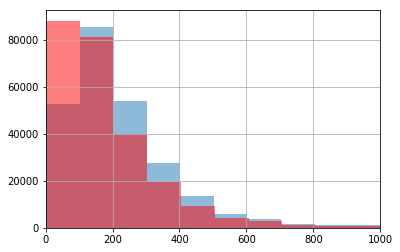

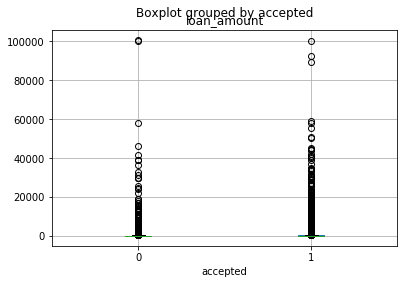

mean: 249.1286053559577 // 194.35273284617784
max: 100333.0 // 100878.0
min: 1.0 // 1.0
median: 184.0 // 141.0


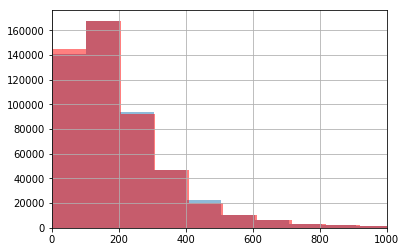

applicant_income


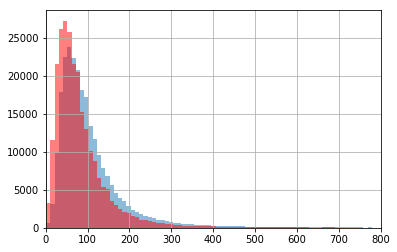

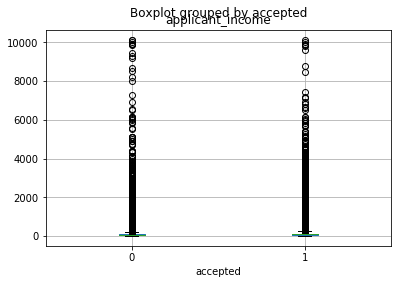

mean: 118.16712139264453 // 92.69396604851754
max: 10109.0 // 10139.0
min: 1.0 // 1.0
median: 84.0 // 66.0


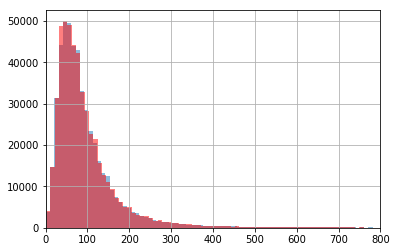

population


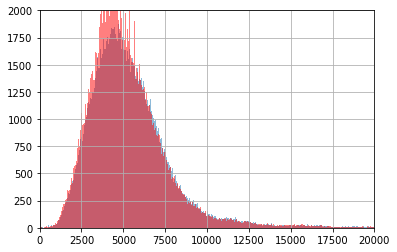

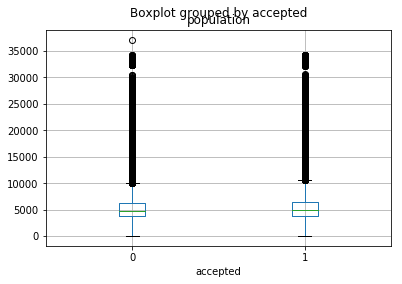

mean: 5463.163683760205 // 5280.97620835103
max: 34176.0 // 37097.0
min: 16.0 // 14.0
median: 5006.0 // 4826.0


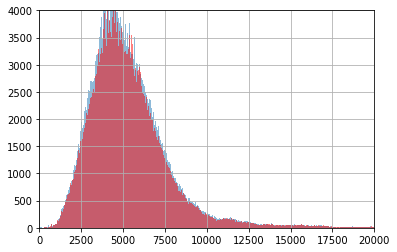

minority


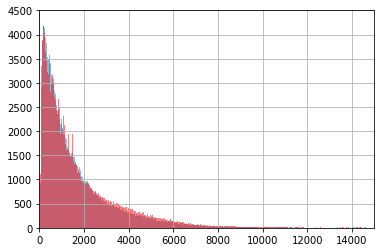

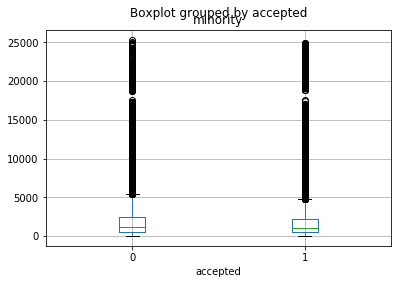

mean: 1663.2564837686486 // 1804.930924372189
max: 24887.938879999998 // 25349.49978
min: 1.0243799999999998 // 2.9259199999999996
median: 1058.4981400000001 // 1133.3474999999999


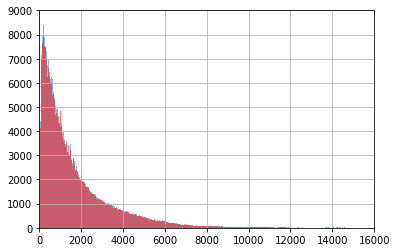

tract_to_msa_md_income_pct


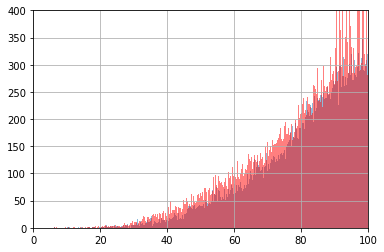

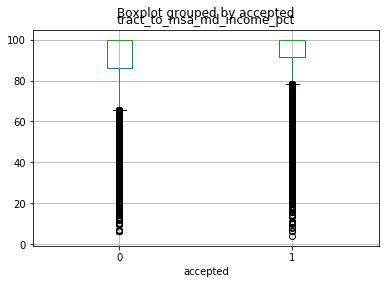

mean: 93.08399838073836 // 90.74740602434443
max: 100.0 // 100.0
min: 3.981 // 6.234
median: 100.0 // 100.0


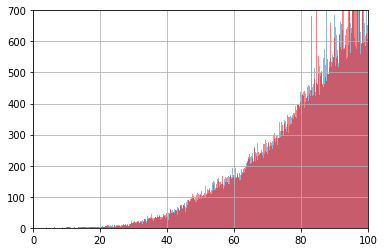

ffiecmedian_family_income


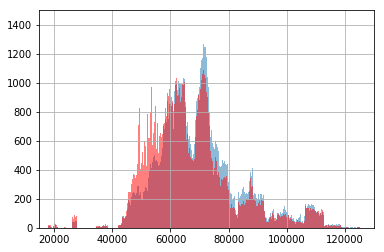

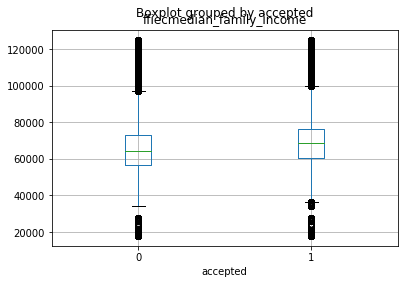

mean: 70131.64631488039 // 66961.63955723825
max: 125248.0 // 125172.0
min: 17858.0 // 17862.0
median: 68783.0 // 64509.0


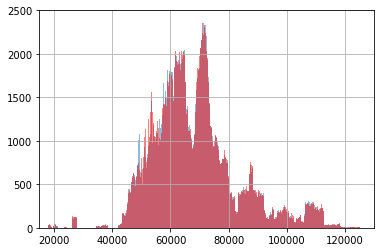

tract_family_income


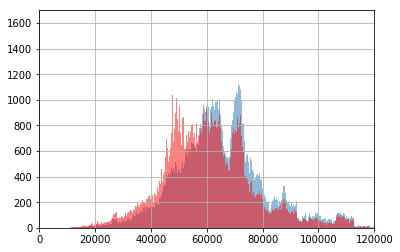

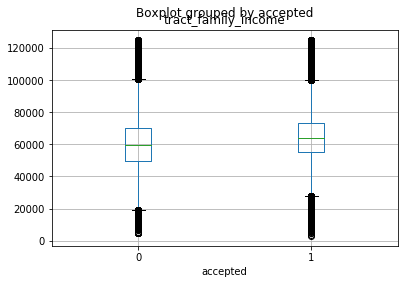

mean: 65178.375182735515 // 60591.55637419373
max: 125248.0 // 125172.0
min: 2930.13543 // 4701.651
median: 64117.159920000006 // 59554.02617


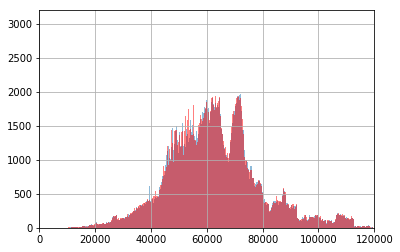

number_of_owner-occupied_units


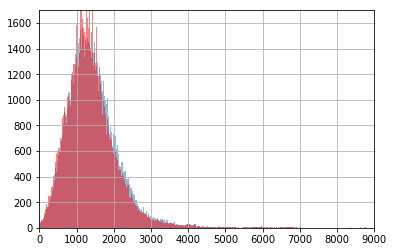

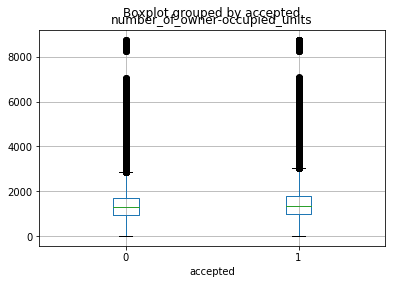

mean: 1452.5139520378696 // 1391.0468701727723
max: 8771.0 // 8761.0
min: 4.0 // 4.0
median: 1349.0 // 1301.0


In [ ]:
total_columns=['loan_type', 'property_type', 'loan_purpose', 'occupancy','loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex','applicant_income', 'minority',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant']
continuos_columns=['loan_amount','applicant_income','population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units']
categorical_columns=['loan_type', 'property_type', 'loan_purpose', 'occupancy','preapproval', 'msa_md', 'state_code', 'county_code','applicant_ethnicity', 'applicant_race', 'applicant_sex','co_applicant', 'lender']
accepted_train=train_data[train_data['accepted']==1]
unaccepted_train=train_data[train_data['accepted']==0]
print( 'loan_amount')
accepted_train[  'loan_amount'].hist(bins=1000, alpha=0.5)
unaccepted_train[  'loan_amount'].hist(bins=1000,color='red', alpha=0.5)

plt.xlim((0,1000))
plt.show()

train_data.boxplot(column= 'loan_amount', by='accepted')

plt.show()
print("mean:",accepted_train[  'loan_amount'].mean(),'//',unaccepted_train[ 'loan_amount'].mean())
print("max:",accepted_train[  'loan_amount'].max(),'//',unaccepted_train[  'loan_amount'].max())
print("min:",accepted_train[  'loan_amount'].min(),'//',unaccepted_train[  'loan_amount'].min())
print("median:",accepted_train[  'loan_amount'].median(),'//',unaccepted_train[  'loan_amount'].median())

train_data[  'loan_amount'].hist(bins=1000, alpha=0.5)
test_data[  'loan_amount'].hist(bins=1000,color='red', alpha=0.5)
plt.xlim((0,1000))
plt.show()


print( 'applicant_income')
accepted_train[ 'applicant_income'].hist(bins=1000, alpha=0.5)
unaccepted_train[  'applicant_income'].hist(bins=1000,color='red', alpha=0.5)

plt.xlim((0,800))
plt.show()

train_data.boxplot(column= 'applicant_income', by='accepted')

plt.show()
print("mean:",accepted_train[ 'applicant_income'].mean(),'//',unaccepted_train[ 'applicant_income'].mean())
print("max:",accepted_train[  'applicant_income'].max(),'//',unaccepted_train[  'applicant_income'].max())
print("min:",accepted_train[  'applicant_income'].min(),'//',unaccepted_train['applicant_income'].min())
print("median:",accepted_train[ 'applicant_income'].median(),'//',unaccepted_train['applicant_income'].median())
train_data[  'applicant_income'].hist(bins=1000, alpha=0.5)
test_data[ 'applicant_income'].hist(bins=1000,color='red', alpha=0.5)
plt.xlim((0,800))
plt.show()

print('population')
accepted_train['population'].hist(bins=1000, alpha=0.5)
unaccepted_train['population'].hist(bins=1000,color='red', alpha=0.5)

plt.xlim((0,20000))
plt.ylim((0,2000))
plt.show()

train_data.boxplot(column= 'population', by='accepted')

plt.show()
print("mean:",accepted_train[ 'population'].mean(),'//',unaccepted_train['population'].mean())
print("max:",accepted_train['population'].max(),'//',unaccepted_train['population'].max())
print("min:",accepted_train['population'].min(),'//',unaccepted_train['population'].min())
print("median:",accepted_train['population'].median(),'//',unaccepted_train['population'].median())

train_data['population'].hist(bins=1000, alpha=0.5)
test_data['population'].hist(bins=1000,color='red', alpha=0.5)
plt.xlim((0,20000))
plt.ylim((0,4000))
plt.show()

print('minority')
accepted_train['minority'].hist(bins=1000, alpha=0.5)
unaccepted_train['minority'].hist(bins=1000,color='red', alpha=0.5)

plt.xlim((0,15000))
plt.ylim((0,4500))
plt.show()

train_data.boxplot(column='minority', by='accepted')

plt.show()
print("mean:",accepted_train['minority'].mean(),'//',unaccepted_train['minority'].mean())
print("max:",accepted_train['minority'].max(),'//',unaccepted_train['minority'].max())
print("min:",accepted_train['minority'].min(),'//',unaccepted_train['minority'].min())
print("median:",accepted_train['minority'].median(),'//',unaccepted_train['minority'].median())

train_data['minority'].hist(bins=1000, alpha=0.5)
test_data['minority'].hist(bins=1000,color='red', alpha=0.5)
plt.xlim((0,16000))
plt.ylim((0,9000))
plt.show()

print('tract_to_msa_md_income_pct')
accepted_train['tract_to_msa_md_income_pct'].hist(bins=1000, alpha=0.5)
unaccepted_train['tract_to_msa_md_income_pct'].hist(bins=1000,color='red', alpha=0.5)

plt.xlim((0,100))
plt.ylim((0,400))
plt.show()

train_data.boxplot(column='tract_to_msa_md_income_pct', by='accepted')

plt.show()
print("mean:",accepted_train['tract_to_msa_md_income_pct'].mean(),'//',unaccepted_train['tract_to_msa_md_income_pct'].mean())
print("max:",accepted_train['tract_to_msa_md_income_pct'].max(),'//',unaccepted_train['tract_to_msa_md_income_pct'].max())
print("min:",accepted_train['tract_to_msa_md_income_pct'].min(),'//',unaccepted_train['tract_to_msa_md_income_pct'].min())
print("median:",accepted_train['tract_to_msa_md_income_pct'].median(),'//',unaccepted_train['tract_to_msa_md_income_pct'].median())

train_data['tract_to_msa_md_income_pct'].hist(bins=1000, alpha=0.5)
test_data['tract_to_msa_md_income_pct'].hist(bins=1000,color='red', alpha=0.5)
plt.xlim((0,100))
plt.ylim((0,700))
plt.show()

print('ffiecmedian_family_income')
accepted_train['ffiecmedian_family_income'].hist(bins=1000, alpha=0.5)
unaccepted_train['ffiecmedian_family_income'].hist(bins=1000,color='red', alpha=0.5)

plt.xlim((15000,130000))
plt.ylim((0,1500))
plt.show()

train_data.boxplot(column='ffiecmedian_family_income', by='accepted')

plt.show()
print("mean:",accepted_train['ffiecmedian_family_income'].mean(),'//',unaccepted_train['ffiecmedian_family_income'].mean())
print("max:",accepted_train['ffiecmedian_family_income'].max(),'//',unaccepted_train['ffiecmedian_family_income'].max())
print("min:",accepted_train['ffiecmedian_family_income'].min(),'//',unaccepted_train['ffiecmedian_family_income'].min())
print("median:",accepted_train['ffiecmedian_family_income'].median(),'//',unaccepted_train['ffiecmedian_family_income'].median())

train_data['ffiecmedian_family_income'].hist(bins=1000, alpha=0.5)
test_data['ffiecmedian_family_income'].hist(bins=1000,color='red', alpha=0.5)
plt.xlim((15000,130000))
plt.ylim((0,2500))
plt.show()

print('tract_family_income')
accepted_train[ 'tract_family_income'].hist(bins=1000, alpha=0.5)
unaccepted_train[ 'tract_family_income'].hist(bins=1000,color='red', alpha=0.5)

plt.xlim((0,120000))
plt.ylim((0,1700))
plt.show()

train_data.boxplot(column='tract_family_income', by='accepted')

plt.show()
print("mean:",accepted_train['tract_family_income'].mean(),'//',unaccepted_train[ 'tract_family_income'].mean())
print("max:",accepted_train['tract_family_income'].max(),'//',unaccepted_train['tract_family_income'].max())
print("min:",accepted_train['tract_family_income'].min(),'//',unaccepted_train['tract_family_income'].min())
print("median:",accepted_train[ 'tract_family_income'].median(),'//',unaccepted_train['tract_family_income'].median())

train_data['tract_family_income'].hist(bins=1000, alpha=0.5)
test_data['tract_family_income'].hist(bins=1000,color='red', alpha=0.5)
plt.xlim((0,120000))
plt.ylim((0,3200))
plt.show()

print("number_of_owner-occupied_units")
accepted_train[ 'number_of_owner-occupied_units'].hist(bins=1000, alpha=0.5)
unaccepted_train[ 'number_of_owner-occupied_units'].hist(bins=1000,color='red', alpha=0.5)

plt.xlim((0,9000))
plt.ylim((0,1700))
plt.show()

train_data.boxplot(column='number_of_owner-occupied_units', by='accepted')

plt.show()
print("mean:",accepted_train[ 'number_of_owner-occupied_units'].mean(),'//',unaccepted_train[ 'number_of_owner-occupied_units'].mean())
print("max:",accepted_train[ 'number_of_owner-occupied_units'].max(),'//',unaccepted_train[ 'number_of_owner-occupied_units'].max())
print("min:",accepted_train[ 'number_of_owner-occupied_units'].min(),'//',unaccepted_train[ 'number_of_owner-occupied_units'].min())
print("median:",accepted_train[ 'number_of_owner-occupied_units'].median(),'//',unaccepted_train[ 'number_of_owner-occupied_units'].median())

train_data['number_of_owner-occupied_units'].hist(bins=1000, alpha=0.5)
test_data['number_of_owner-occupied_units'].hist(bins=1000,color='red', alpha=0.5)
plt.xlim((0,9000))
plt.ylim((0,3200))
plt.show()

print( 'number_of_1_to_4_family_units')
accepted_train[  'number_of_1_to_4_family_units'].hist(bins=1000, alpha=0.5)
unaccepted_train[  'number_of_1_to_4_family_units'].hist(bins=1000,color='red', alpha=0.5)

plt.xlim((0,15000))
plt.ylim((0,2200))
plt.show()

train_data.boxplot(column= 'number_of_1_to_4_family_units', by='accepted')

plt.show()
print("mean:",accepted_train[  'number_of_1_to_4_family_units'].mean(),'//',unaccepted_train[ 'number_of_1_to_4_family_units'].mean())
print("max:",accepted_train[  'number_of_1_to_4_family_units'].max(),'//',unaccepted_train[  'number_of_1_to_4_family_units'].max())
print("min:",accepted_train[  'number_of_1_to_4_family_units'].min(),'//',unaccepted_train[  'number_of_1_to_4_family_units'].min())
print("median:",accepted_train[  'number_of_1_to_4_family_units'].median(),'//',unaccepted_train[  'number_of_1_to_4_family_units'].median())

train_data['number_of_1_to_4_family_units'].hist(bins=1000, alpha=0.5)
test_data['number_of_1_to_4_family_units'].hist(bins=1000,color='red', alpha=0.5)
plt.xlim((0,9000))
plt.ylim((0,4000))
plt.show()

train_combine=train_data
train_combine['dummy'] = np.ones(shape = train_combine.shape[0])
for col in categorical_columns:
    counts = train_combine[['dummy', 'accepted', col]].groupby(['accepted', col], as_index = False).count()
    temp = counts[counts['accepted'] == 0][[col, 'dummy']]
    _ = plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    temp = counts[counts['accepted'] == 0][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n unaccepted')
    plt.subplot(1, 2, 2)
    temp = counts[counts['accepted'] == 1][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.title('Counts for ' + col + '\n accepted')
    plt.xticks(rotation=90)
    plt.show()


counts = train_combine[['dummy', 'accepted', 'lender']].groupby(['accepted','lender'], as_index = False).count()
temp = counts[counts['accepted'] == 0][['lender', 'dummy']]
_ = plt.figure(figsize = (10,4))
plt.subplot(1, 2, 1)
temp = counts[counts['accepted'] == 0][['lender', 'dummy']]
plt.bar(temp['lender'], temp.dummy)
plt.xticks(rotation=90)
plt.ylim((0,1500))
plt.title('Counts for ' + 'lender' + '\n unaccepted')
plt.subplot(1, 2, 2)
temp = counts[counts['accepted'] == 1][['lender', 'dummy']]
plt.bar(temp['lender'], temp.dummy)
plt.title('Counts for ' + 'lender' + '\n accepted')
plt.xticks(rotation=90)
plt.ylim((0,1500))
plt.show()


In [ ]:
# do log transformation
train_data['loan_amount_log'] = np.log(train_data['loan_amount'])
test_data['loan_amount_log'] = np.log(test_data['loan_amount'])
train_data['applicant_income_log'] = np.log(train_data['applicant_income'])
test_data['applicant_income_log'] = np.log(test_data['applicant_income'])
train_data['population_log'] = np.log(train_data['population'])
test_data['population_log'] = np.log(test_data['population'])
train_data[ 'minority_log'] = np.log(train_data[ 'minority'])
test_data['minority_log'] = np.log(test_data['minority'])
train_data['tract_family_income_log'] = np.log(train_data['tract_family_income'])
test_data['tract_family_income_log'] = np.log(test_data['tract_family_income'])
train_data['number_of_owner-occupied_units_log'] = np.log(train_data['number_of_owner-occupied_units'])
test_data['number_of_owner-occupied_units_log'] = np.log(test_data['number_of_owner-occupied_units'])
train_data['number_of_1_to_4_family_units_log'] = np.log(train_data['number_of_1_to_4_family_units'])
test_data['number_of_1_to_4_family_units_log'] = np.log(test_data['number_of_1_to_4_family_units'])

In [ ]:
accepted_train=train_data[train_data['accepted']==1]
unaccepted_train=train_data[train_data['accepted']==0]
print( 'minority_log')
accepted_train[  'county_accept_prob'].hist(bins=1000, alpha=0.5)
unaccepted_train[  'county_accept_prob'].hist(bins=1000,color='red', alpha=0.5)
plt.xlim((0,1))
plt.ylim((0,100))



plt.show()

train_data.boxplot(column= 'tract_family_income', by='accepted')

plt.show()
print("mean:",accepted_train[  'minority_log'].mean(),'//',unaccepted_train[ 'loan_amount_log'].mean())
print("max:",accepted_train[  'minority_log'].max(),'//',unaccepted_train[  'loan_amount_log'].max())
print("min:",accepted_train[  'loan_amount_log'].min(),'//',unaccepted_train[  'loan_amount_log'].min())
print("median:",accepted_train[  'loan_amount_log'].median(),'//',unaccepted_train[  'loan_amount_log'].median())

train_data[  'county_accept_prob'].hist(bins=1000, alpha=0.5)
test_data[  'county_accept_prob'].hist(bins=1000,color='red', alpha=0.5)
plt.xlim((0,20))
plt.show()

In [ ]:
train_data=train_data.sort_values(by=['row_id'])
print(train_data)
print(test_data)

In [ ]:
predictor_var =['loan_amount_log','applicant_income_log','minority_log','tract_family_income',  'loan_purpose',
                'preapproval','applicant_race','county_accept_prob','lender_accept_prob']
test_data['county_accept_prob']=test_data['county_accept_prob'].fillna(test_data['county_accept_prob'].median())
test_data['lender_accept_prob']=test_data['lender_accept_prob'].fillna(test_data['lender_accept_prob'].median())
for col in predictor_var:
    print(test_data[test_data[col].isnull()])


In [ ]:
print(train_data.shape)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
from xgboost import XGBClassifier
from vecstack import stacking
from sklearn.metrics import accuracy_score 
from sklearn.neighbors import KNeighborsClassifier 

#KNeighborsClassifier(n_neighbors=5), 
#RandomForestClassifier(random_state=0, n_estimators=100, max_depth=3),     accuacy=0.71953000
#XGBClassifier(random_state=0, learning_rate=0.1, n_estimators=100, max_depth=3)  score:0.7134
outcome=train_labels['accepted']
train_data_stacking=train_data.drop(columns=['accepted']).values
test_data_stacking=test_data.values
#X_train, X_test, y_train, y_test = train_test_split(train_data, outcome, test_size=0.2, random_state=0)
models = [ KNeighborsClassifier(n_neighbors=5), 
          RandomForestClassifier(random_state=0, n_estimators=100, max_depth=3), 
          XGBClassifier(random_state=0, learning_rate=0.1, n_estimators=100, max_depth=3) ]


S_train, S_test = stacking(models, 
 train_data_stacking,outcome,test_data_stacking, 
 regression=False, 
 
 mode='oof_pred_bag', 
 
 needs_proba=False,
 
 save_dir=None, 
 
 metric=accuracy_score, 
 
 n_folds=4, 
 
 stratified=True,
 
 shuffle=True, 
 
 random_state=0, 
 
 verbose=2)

model = XGBClassifier(random_state=0, learning_rate=0.1, n_estimators=100, max_depth=3) 
model = model.fit(S_train, outcome) 
y_pred = model.predict(S_test) 
#print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))



# Final prediction score
#print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

In [ ]:
vecstack1=pd.read_csv("vecstack1.csv")
vecstack1['accepted']=y_pred 
vecstack1.to_csv("vecstack1.csv", encoding='utf-8', index=False)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
from xgboost import XGBClassifier
from vecstack import stacking
from sklearn.metrics import accuracy_score 
from sklearn.neighbors import KNeighborsClassifier 

# accuracy:0.72087600   score:0.7235 

outcome=train_labels['accepted']
train_data_stacking=train_data.drop(columns=['accepted']).values
test_data_stacking=test_data.values
#X_train, X_test, y_train, y_test = train_test_split(train_data, outcome, test_size=0.2, random_state=0)
# 2*XGBC accuracy 0.7289540  score:0.7242
models = [ 
          xgb.XGBClassifier(max_depth=10,n_estimators=100),
         ]


S_train, S_test = stacking(models, 
 train_data_stacking,outcome,test_data_stacking, 
 regression=False, 
 
 mode='oof_pred_bag', 
 
 needs_proba=False,
 
 save_dir=None, 
 
 metric=accuracy_score, 
 
 n_folds=4, 
 
 stratified=True,
 
 shuffle=True, 
 
 random_state=0, 
 
 verbose=2)

model =XGBClassifier(n_estimators=100)

model = model.fit(S_train, outcome) 
y_pred2 = model.predict(S_test) 
#print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

vecstack2=pd.read_csv("vecstack1.csv")
vecstack2['accepted']=y_pred2 
vecstack2.to_csv("vecstack1.csv", encoding='utf-8', index=False)

# Final prediction score
#print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

In [ ]:
vecstack2=pd.read_csv("vecstack2.csv")
print(vecstack2['accepted'])

In [ ]:
def classificationori_model(test_data,model,data,predictors, outcome,test_size):
  #Fit the model:
    print("test size:",test_size)
    labels=outcome
    X_train, X_test, y_train, y_test = train_test_split(data, labels,test_size=test_size)
    model.fit(X_train,y_train)
   
   #Make predictions on training set:
    predictions = model.predict(X_test)
    accuracy = metrics.accuracy_score(predictions,y_test)
    print ("Accuracy : " + str(accuracy))
    probabilities = model.predict_proba(X_test)
    #plot_auc(y_test, probabilities)
    print(roc_auc_score(y_test, probabilities[:,1]))
    kf = KFold(n_splits=5)
    print(kf.get_n_splits(data))
    error = []
    for train_index, test_index in kf.split(data):
    # Filter training data
        train_predictors = (data[predictors].iloc[train_index,:])
    
    # The target we're using to train the algorithm.
        train_target = labels.iloc[train_index]
    
    # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test_index,:], labels.iloc[test_index]))
     
    print ("Cross-Validation Score :" + str((np.mean(error))))
    modelprediction_train=model.predict(data[predictors])
    modelprediction_test=model.predict(test_data[predictors])
    return(modelprediction_train,modelprediction_test)
    

In [ ]:
#'loan_amount', 'applicant_income','population', 'tract_family_income', 
#'loan_purpose','preaproval', 'county_accept_prob','lender_accept_prob',' co_applicant '
#no log transformation: Accuracy : 0.501576  Cross-Validation Score :0.500228
#log transformation: Accuracy : 0.706168     Cross-Validation Score :0.705464
predictor =['loan_purpose','preapproval','applicant_ethnicity', 'applicant_race','state_accept_prob','county_accept_prob','co_applicant','lender_accept_prob','minority','loan_amount','applicant_income','tract_family_income']
train_data_=train_data[predictor_var]
test_data_=test_data[predictor_var]
from sklearn.linear_model import LogisticRegression
outcome=train_labels['accepted']
model =LogisticRegression(random_state=0, solver='lbfgs',multi_class='ovr')
#M1train_predict_list,M1test_predict_list=
modelprediction_train1,modelprediction_test1=classificationori_model(test_data_,model,train_data_,predictor_var,outcome,.25)

In [ ]:
#no log transformation: Accuracy :0.713888   Cross-Validation Score :0.713072

# log   transformation: Accuracy :0.714688   Cross-Validation Score :0.716321999

from sklearn.ensemble import RandomForestClassifier

model =RandomForestClassifier(n_estimators=100)   
modelprediction_train2,modelprediction_test2=classificationori_model(test_data_,model,train_data_,predictor_var,outcome,.25)


In [ ]:
#no log transformation: Accuracy : 0.632712   Cross-Validation Score :0.635852
# log   transformation: Accuracy : 0.636288  Cross-Validation Score :0.637178
model = DecisionTreeClassifier()    
modelprediction_train3,modelprediction_test3=classificationori_model(test_data_,model,train_data_,predictor_var,outcome,.25)


In [ ]:
#no log transformation: Accuracy :0.575776   Cross-Validation Score :0.578375
# log   transformation: Accuracy :0.67384    Cross-Validation Score :0.674888

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()    
modelprediction_train4,modelprediction_test4=classificationori_model(test_data_,model,train_data_,predictor_var,outcome,.25)


In [ ]:
#no log transformation: Accuracy :0.7124   Cross-Validation Score :0.714114
# log   transformation: Accuracy :0.715064 Cross-Validation Score :0.715426

model=GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=1, random_state=0)
modelprediction_train5,modelprediction_test5=classificationori_model(test_data_,model,train_data_,predictor_var,outcome,.25)


In [ ]:
#no log transformation: Accuracy : 0.723368   Cross-Validation Score :0.723540
# log   transformation: Accuracy : 0.725152   Cross-Validation Score :0.724838

import xgboost as xgb
model=xgb.XGBClassifier(max_depth=10,n_estimators=100)  
modelprediction_train6,modelprediction_test6=classificationori_model(test_data_,model,train_data_,predictor_var,outcome,.25)


In [ ]:
predictor =['loan_purpose','preapproval','applicant_ethnicity', 'applicant_race','state_accept_prob','county_accept_prob','co_applicant','lender_accept_prob','minority_log','loan_amount_log','applicant_income_log','tract_family_income_log']

train_data_=train_data[predictor]
test_data_=test_data[predictor]
print('Logistic')
model =LogisticRegression(random_state=0, solver='lbfgs',multi_class='ovr')
modelprediction_train7,modelprediction_test7=classificationori_model(test_data_,model,train_data_,predictor,outcome,.25)
print('RandomForest')

model =RandomForestClassifier(n_estimators=100)   
modelprediction_train8,modelprediction_test8=classificationori_model(test_data_,model,train_data_,predictor,outcome,.25)

print('DecisionTree')

model = DecisionTreeClassifier()    
modelprediction_train9,modelprediction_test9=classificationori_model(test_data_,model,train_data_,predictor,outcome,.25)

print('KNeighbors')

model = KNeighborsClassifier()    
modelprediction_train10,modelprediction_test10=classificationori_model(test_data_,model,train_data_,predictor,outcome,.25)

print('GradientBoosting')
model=GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=1, random_state=0)
modelprediction_train11,modelprediction_test11=classificationori_model(test_data_,model,train_data_,predictor,outcome,.25)

print('XGB')
model=xgb.XGBClassifier(max_depth=10,n_estimators=100) 
modelprediction_train12,modelprediction_test12=classificationori_model(test_data_,model,train_data_,predictor,outcome,.25)







In [ ]:
modeltrain=pd.DataFrame()
modeltrain['m1']=modelprediction_train1
modeltrain['m2']=modelprediction_train2
modeltrain['m3']=modelprediction_train3
modeltrain['m4']=modelprediction_train4
modeltrain['m5']=modelprediction_train5
modeltrain['m6']=modelprediction_train6
modeltrain['m7']=modelprediction_train7
modeltrain['m8']=modelprediction_train8
modeltrain['m9']=modelprediction_train9
modeltrain['m10']=modelprediction_train10
modeltrain['m11']=modelprediction_train11
modeltrain['m12']=modelprediction_train12
modeltrain['m13']=modelprediction_train13
modeltrain['m14']=modelprediction_train14
modeltrain['m15']=modelprediction_train15
modeltrain['m16']=modelprediction_train16
modeltrain['m17']=modelprediction_train17
modeltrain['m18']=modelprediction_train18
modeltrain['m19']=modelprediction_train19
modeltrain['m20']=modelprediction_train20
modeltrain['m21']=modelprediction_train21
modeltrain['m22']=modelprediction_train22
modeltrain['m23']=modelprediction_train23
modeltrain['m24']=modelprediction_train24


modeltest=pd.DataFrame()
modeltest['m1']=modelprediction_test1
modeltest['m2']=modelprediction_test2
modeltest['m3']=modelprediction_test3
modeltest['m4']=modelprediction_test4
modeltest['m5']=modelprediction_test5
modeltest['m6']=modelprediction_test6
modeltest['m7']=modelprediction_test7
modeltest['m8']=modelprediction_test8
modeltest['m9']=modelprediction_test9
modeltest['m10']=modelprediction_test10
modeltest['m11']=modelprediction_test11
modeltest['m12']=modelprediction_test12
modeltest['m13']=modelprediction_test13
modeltest['m14']=modelprediction_test14
modeltest['m15']=modelprediction_test15
modeltest['m16']=modelprediction_test16
modeltest['m17']=modelprediction_test17
modeltest['m18']=modelprediction_test18
modeltest['m19']=modelprediction_test19
modeltest['m20']=modelprediction_test20
modeltest['m21']=modelprediction_test21
modeltest['m22']=modelprediction_test22
modeltest['m23']=modelprediction_test23
modeltest['m24']=modelprediction_test24

In [ ]:
import pandas as pd

v6test=pd.read_csv("modelV6test.csv")
v6test['m1']=modeltest['m1']
v6test['m2']=modeltest['m2']
v6test['m3']=modeltest['m3']
v6test['m4']=modeltest['m4']
v6test['m5']=modeltest['m5']
v6test['m6']=modeltest['m6']
v6test['m7']=modeltest['m7']
v6test['m8']=modeltest['m8']
v6test['m9']=modeltest['m9']
v6test['m10']=modeltest['m10']
v6test['m11']=modeltest['m11']
v6test['m12']=modeltest['m12']
v6test['m13']=modeltest['m13']
v6test['m14']=modeltest['m14']
v6test['m15']=modeltest['m15']
v6test['m16']=modeltest['m16']
v6test['m17']=modeltest['m17']
v6test['m18']=modeltest['m18']
v6test['m19']=modeltest['m19']
v6test['m20']=modeltest['m20']
v6test['m21']=modeltest['m21']
v6test['m22']=modeltest['m22']
v6test['m23']=modeltest['m23']
v6test['m24']=modeltest['m24']


v6test.to_csv("modelV6test.csv", encoding='utf-8', index=False)

In [ ]:
v6train=pd.read_csv("modelV6train.csv")
v6train['m1']=modeltrain['m1']
v6train['m2']=modeltrain['m2']
v6train['m3']=modeltrain['m3']
v6train['m4']=modeltrain['m4']
v6train['m5']=modeltrain['m5']
v6train['m6']=modeltrain['m6']
v6train['m7']=modeltrain['m7']
v6train['m8']=modeltrain['m8']
v6train['m9']=modeltrain['m9']
v6train['m10']=modeltrain['m10']
v6train['m11']=modeltrain['m11']
v6train['m12']=modeltrain['m12']
v6train['m13']=modeltrain['m13']
v6train['m14']=modeltrain['m14']
v6train['m15']=modeltrain['m15']
v6train['m16']=modeltrain['m16']
v6train['m17']=modeltrain['m17']
v6train['m18']=modeltrain['m18']
v6train['m19']=modeltrain['m19']
v6train['m20']=modeltrain['m20']
v6train['m21']=modeltrain['m21']
v6train['m22']=modeltrain['m22']
v6train['m23']=modeltrain['m23']
v6train['m24']=modeltrain['m24']


v6train.to_csv("modelV6train.csv", encoding='utf-8', index=False)

In [ ]:
v6train=pd.read_csv("modelV6train.csv")
v6test=pd.read_csv("modelV6test.csv")
modeltrain=v6train
modeltest=v6test


In [ ]:
#'m14','m17','m18','m19','m21','m22'Accuracy : 0.944464  Cross-Validation Score :0.9270479999999999 AUC: 0.9597439936392631
train_labels=pd.read_csv("train_labels.csv")

predictor=['m21','m24','m24']
train_data_2=modeltrain[predictor]
test_data_2=modeltest[predictor]

outcome=train_labels['accepted']
model=RandomForestClassifier(n_estimators=100)

X_train, X_test, y_train, y_test = train_test_split(train_data_2, outcome,test_size=.25)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
accuracy = metrics.accuracy_score(predictions,y_test)
print ("Accuracy : " + str(accuracy))

kf = KFold(n_splits=5)
error = []
for train_index, test_index in kf.split(train_data_2):
    # Filter training data
    train_predictors = (train_data_2.iloc[train_index,:])
    
    # The target we're using to train the algorithm.
    train_target = outcome.iloc[train_index]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(train_data_2.iloc[test_index,:], outcome.iloc[test_index]))
print ("Cross-Validation Score :" + str((np.mean(error))))

probabilities = model.predict_proba(X_test)
    #plot_auc(y_test, probabilities)
print("AUC:",roc_auc_score(y_test, probabilities[:,1]))
finaloutput=model.predict(test_data_2)
print(finaloutput)

In [ ]:
#Accuracy : 0.941952  Cross-Validation Score :0.9415479999               m1~m12
#Accuracy : 0.941792  Cross-Validation Score :0.9420379999999999  SCORE  0.7062 'm8','m10','m11','m12'
#Accuracy : 0.736768  Cross-Validation Score :0.7374280000000001  SCORE  0.7166  'm11','m12'
#Accuracy : 0.760928  Cross-Validation Score :0.758638            SCORE  0.6432 'm1','m5','m4','m10','m12'
#Accuracy : 0.944008  Cross-Validation Score :0.9272179999999999                 m1~m24
#Accuracy : 0.741272  Cross-Validation Score :0.741466                            m7m24  
#Accuracy : 0.9438    Cross-Validation Score :0.9270419999999999                'm19','m20','m21','m22','m23','m24'
#Accuracy : 0.742472  Cross-Validation Score :0.741466            SCORE  0.7190  'm23','m24'4/17v1
#Accuracy : 0.76308   Cross-Validation Score :0.763354                'm22','m23','m24'  4/17 v2?
predictor=['m23','m24']
train_data_2=modeltrain[predictor]
test_data_2=modeltest[predictor]

outcome=train_labels['accepted']
model=xgb.XGBClassifier(max_depth=5,n_estimators=100) 

X_train, X_test, y_train, y_test = train_test_split(train_data_2, outcome,test_size=.25)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
accuracy = metrics.accuracy_score(predictions,y_test)
print ("Accuracy : " + str(accuracy))

kf = KFold(n_splits=5)
error = []
for train_index, test_index in kf.split(train_data_2):
    # Filter training data
    train_predictors = (train_data_2.iloc[train_index,:])
    
    # The target we're using to train the algorithm.
    train_target = outcome.iloc[train_index]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(train_data_2.iloc[test_index,:], outcome.iloc[test_index]))
print ("Cross-Validation Score :" + str((np.mean(error))))

probabilities = model.predict_proba(X_test)
    #plot_auc(y_test, probabilities)
print("AUC:",roc_auc_score(y_test, probabilities[:,1]))
finaloutput=model.predict(test_data_2)
print(finaloutput)

Stacking without 正規化


In [ ]:
final = pd.read_csv("submission0417 v1.csv")
final['accepted']=finaloutput
final.to_csv("submission0417 v1.csv", encoding='utf-8', index=False)

正規化
Logistic          Accuracy : 0.702984          Cross-Validation Score :0.70153
RandomForest      Accuracy : 0.717216          Cross-Validation Score :0.716784
DecisionTree      Accuracy : 0.635608          Cross-Validation Score :0.637124
KNeighbors        Accuracy : 0.678432          Cross-Validation Score :0.678516

In [ ]:
from sklearn import preprocessing 
def classification_nor_model(test_data,model,data,predictors, outcome,test_size):
  #Fit the model:
    data = preprocessing.scale(data)
    test_data = preprocessing.scale(test_data)

    print("test size:",test_size)
    labels=outcome
    X_train, X_test, y_train, y_test = train_test_split(data, labels,test_size=test_size)
    model.fit(X_train,y_train)
   
   #Make predictions on training set:
    predictions = model.predict(X_test)
    accuracy = metrics.accuracy_score(predictions,y_test)
    print ("Accuracy : " + str(accuracy))
    probabilities = model.predict_proba(X_test)
    #plot_auc(y_test, probabilities)
    print(roc_auc_score(y_test, probabilities[:,1]))
    kf = KFold(n_splits=5)
    print(kf.get_n_splits(data))
    error = []
    for train_index, test_index in kf.split(data):
    # Filter training data
        train_predictors = (data[train_index])
    
    # The target we're using to train the algorithm.
        train_target = labels.iloc[train_index]
    
    # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
        error.append(model.score(data[test_index], labels.iloc[test_index]))
     
    print ("Cross-Validation Score :" + str((np.mean(error))))
    modelprediction_train=model.predict(data)
    modelprediction_test=model.predict(test_data)
    return(modelprediction_train,modelprediction_test)
    

In [ ]:
predictor =['loan_purpose','preapproval','applicant_ethnicity', 'applicant_race','state_accept_prob','county_accept_prob','co_applicant','lender_accept_prob','minority','loan_amount','applicant_income','tract_family_income']


train_data_nor=train_data[predictor]
test_data_nor=test_data[predictor]
print('Logistic')
model =LogisticRegression(random_state=0, solver='lbfgs',multi_class='ovr')
modelprediction_train13,modelprediction_test13=classification_nor_model(test_data_nor,model,train_data_nor,predictor,outcome,.25)
print('RandomForest')
model =RandomForestClassifier(n_estimators=100)   
modelprediction_train14,modelprediction_test14=classification_nor_model(test_data_nor,model,train_data_nor,predictor,outcome,.25)
print('DecisionTree')

model = DecisionTreeClassifier()    
modelprediction_train15,modelprediction_test15=classification_nor_model(test_data_nor,model,train_data_nor,predictor,outcome,.25)
print('KNeighbors')

model = KNeighborsClassifier()    
modelprediction_train16,modelprediction_test16=classification_nor_model(test_data_nor,model,train_data_nor,predictor,outcome,.25)
print('GradientBoosting')
model=GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=1, random_state=0)
modelprediction_train17,modelprediction_test17=classification_nor_model(test_data_nor,model,train_data_nor,predictor,outcome,.25)


print('XGB')
model=xgb.XGBClassifier(max_depth=10,n_estimators=100) 
modelprediction_train18,modelprediction_test18=classification_nor_model(test_data_,model,train_data_,predictor,outcome,.25)

In [ ]:
predictor =['loan_purpose','preapproval','applicant_ethnicity', 'applicant_race','state_accept_prob','county_accept_prob','co_applicant','lender_accept_prob','minority_log','loan_amount_log','applicant_income_log','tract_family_income_log']


train_data_nor=train_data[predictor]
test_data_nor=test_data[predictor]
print('Logistic')
model =LogisticRegression(random_state=0, solver='lbfgs',multi_class='ovr')
modelprediction_train19,modelprediction_test19=classification_nor_model(test_data_nor,model,train_data_nor,predictor,outcome,.25)
print('RandomForest')
model =RandomForestClassifier(n_estimators=100)   
modelprediction_train20,modelprediction_test20=classification_nor_model(test_data_nor,model,train_data_nor,predictor,outcome,.25)
print('DecisionTree')

model = DecisionTreeClassifier()    
modelprediction_train21,modelprediction_test21=classification_nor_model(test_data_nor,model,train_data_nor,predictor,outcome,.25)
print('KNeighbors')

model = KNeighborsClassifier()    
modelprediction_train22,modelprediction_test22=classification_nor_model(test_data_nor,model,train_data_nor,predictor,outcome,.25)
print('GradientBoosting')
model=GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=1, random_state=0)
modelprediction_train23,modelprediction_test23=classification_nor_model(test_data_nor,model,train_data_nor,predictor,outcome,.25)
print('XGB')
model=xgb.XGBClassifier(max_depth=10,n_estimators=100) 
modelprediction_train24,modelprediction_test24=classification_nor_model(test_data_,model,train_data_,predictor,outcome,.25)